<a href="https://colab.research.google.com/github/ColinSpear1/Financial_Inclusion/blob/main/XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Energy Efficiency Data Set**
In the M2 Hackathon we will use "Energy efficiency" dataset.

The data is available for download as a csv file [here](https://drive.google.com/file/d/1wcSDPcD_gbpDq8dF68OTF43oW4iAda4a/view?usp=sharing).
The csv file name is **"Energy Efficiency_Section 52.csv"**


#**Business Problem**
This study looked into assessing the heating load using different function of building parameters. The dataset contains eight features. The target variable is y1 = heating load. Ignore the second target variable: y2 = cooling load.

The task in the M2 Hackathon is to determine data preprocessing needs and develop inferences about the data. For example: what is the shape and type of the data? Which variables are quantitative? Which are categorical? Are there missing values? What about duplicates? If so, what do you propose to do about these issues (note: propose remedies but do **not** implement them)? Is skewness a problem? What about outliers? Are any encodings needed? Is the target variable balanced? Do any of the predictors have a significant correlation with the target variable? Are there any interesting observations abour or visualizations of the data that you think should be noted?

# **Conclusion**

1.   **it is a classification project.**
2.   X1, X2, X3, X4, X7, X8 is ‘float64’; X5,Y1(target variable) is ‘object’; X6 is ‘int64’.
3.   X4, X5, X6, X7, X8 is categorical, others are quantitative.
4.   There are missing values in X1, X8, Y2.
5.   There are 22 duplicates.
6.   General univariate descriptive statistics is shown above.
7.   Skewness is a concern for some variables like X4, Y2. Y1 has moderate skewness. Y2 has high skewness.
8.   There are outliers in X4, Y2.
9.   One-hot encoding.(dummy)
10.  It is neither numeric nor balanced.
11.  Only X7, the glazing area, have strong correlation with Y1. The correlation is -0.78. Therefore, it is a good predictor.
12.  According to the parallel coordinates plot, we cannot make conclusions about multivarible outliers because the data is very unbalanced. 



# **BLUF**

   Looking at the data through numerous Visualization tools it can be seen that there are not many strong predictors for the  Y1 Variable (heating load) after looking at the correlation matrix, pairplot, and Violin plot, it can be concluded that the X7 variable (Glazing Area) is the only valuable predictor. The target (Y1) was unbalanced at 82.37%.



#**Data Dictionary**
- X1 Relative Compactness
- X2 Surface Area
- X3 Wall Area
- X4 Roof Area
- X5 Overall Height
- X6 Orientation
- X7 Glazing Area
- X8 Glazing Area Distribution
- **y1** Heating Load
- y2 Cooling Load

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read 
file_ = "/content/drive/MyDrive/HackData/Energy Efficiency Section_52.csv"   # adapt this as needed to the file structure on your Google drive
df = pd.read_csv(file_) # read in csv file

#**M2 Hackathon Starts Here**
The ball is now in your court. Your objective is to perform exploratory data analysis. Good luck!

In [ ]:
!pip install --upgrade plotly   # you may need to pip install plotly
!pip install jupyter-dash       # you may need to install jupyter-dash

import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output 

In [ ]:
!pip install sweetviz     # You may need to pip install sweetviz
import sweetviz as sv

In [ ]:
# Examine the data using df.head() or df.tail()
print("HEAD of df\n", df.head(20))
print("\nTAIL of df\n", df.tail())

# Shape of DataFrame
print("\nSHAPE of df\n", df.shape) 

HEAD of df
       X1     X2     X3      X4            X5  X6   X7   X8                Y1  \
0   0.98  514.5  294.0  110.25  Hight Height   2  0.0  0.0  Low heating load   
1   0.98  514.5  294.0  110.25  Hight Height   3  0.0  0.0  Low heating load   
2   0.98  514.5  294.0  110.25  Hight Height   4  0.0  0.0  Low heating load   
3   0.98  514.5  294.0  110.25  Hight Height   5  0.0  0.0  Low heating load   
4   0.90  563.5  318.5  122.50  Hight Height   2  0.0  0.0  Low heating load   
5   0.90  563.5  318.5  122.50  Hight Height   3  0.0  0.0  Low heating load   
6   0.90  563.5  318.5  122.50  Hight Height   4  0.0  0.0  Low heating load   
7   0.90  563.5  318.5  122.50  Hight Height   5  0.0  0.0  Low heating load   
8   0.86  588.0  294.0  147.00  Hight Height   2  0.0  0.0  Low heating load   
9   0.86  588.0  294.0  147.00  Hight Height   3  0.0  0.0  Low heating load   
10  0.86  588.0  294.0  147.00  Hight Height   4  0.0  0.0  Low heating load   
11  0.86  588.0  294.0  147.

## **Missing Value**

In [ ]:
# Checks

# Check data types
print(df.info())

# Check for missing values
print('\n\nMissing Values\n',df.isnull().sum(axis=0))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      751 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    object 
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      672 non-null    float64
 8   Y1      768 non-null    object 
 9   Y2      764 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 60.1+ KB
None


Missing Values
 X1    17
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8    96
Y1     0
Y2     4
dtype: int64


## **Duplicates**

In [ ]:
# Check for duplicates
print('\n Duplicates\n',df.duplicated().sum())


 Duplicates
 22


## **Descriptive Statistics**

In [ ]:
# Univariate descriptive statistics using pandas

# Ensure the maximum number of columns are displayed in pandas
pd.set_option('display.max_columns', None)

# Univariate numerical statistics using pandas .describe 
print("UNIVARIATE DESCRIPTIVE STAT using pandas\n",df.describe(include='all').T)
print("\n SKEWNESS\n",df.skew())
print("\n FISHER'S KURTOSIS\n",df.kurt())

UNIVARIATE DESCRIPTIVE STAT using pandas
     count unique                top freq        mean         std     min  \
X1  751.0    NaN                NaN  NaN    0.765619    0.107482    0.62   
X2  768.0    NaN                NaN  NaN  669.794271   88.905503   514.5   
X3  768.0    NaN                NaN  NaN  317.861979    42.71537   245.0   
X4  768.0    NaN                NaN  NaN  238.199219  549.109147  110.25   
X5    768      2       Hight Height  392         NaN         NaN     NaN   
X6  768.0    NaN                NaN  NaN    3.483073    1.105739     2.0   
X7  768.0    NaN                NaN  NaN    0.234375    0.133221     0.0   
X8  672.0    NaN                NaN  NaN    2.571429    1.499414     0.0   
Y1    768      2  High heating load  530         NaN         NaN     NaN   
Y2  764.0    NaN                NaN  NaN   43.673992  135.771396   -10.0   

        25%     50%      75%     max  
X1     0.66    0.74     0.86    0.98  
X2    588.0   661.5  741.125   808.5  
X3  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':


In [ ]:
# Numerically encode target so that it appears in, for example, pairplots
df = pd.get_dummies(data=df, columns=['X5','Y1'],drop_first=True)

In [ ]:
# Univariate descriptive statistics using pandas

# Ensure the maximum number of columns are displayed in pandas
pd.set_option('display.max_columns', None)

# Univariate numerical statistics using pandas .describe 
print("UNIVARIATE DESCRIPTIVE STAT using pandas\n",df.describe(include='all').T)
print("\n SKEWNESS\n",df.skew())
print("\n FISHER'S KURTOSIS\n",df.kurt())

UNIVARIATE DESCRIPTIVE STAT using pandas
                      count        mean         std     min       25%      50%  \
X1                   751.0    0.765619    0.107482    0.62    0.6600    0.740   
X2                   768.0  669.794271   88.905503  514.50  588.0000  661.500   
X3                   768.0  317.861979   42.715370  245.00  294.0000  318.500   
X4                   768.0  238.199219  549.109147  110.25  147.0000  147.000   
X6                   768.0    3.483073    1.105739    2.00    3.0000    3.000   
X7                   768.0    0.234375    0.133221    0.00    0.1000    0.250   
X8                   672.0    2.571429    1.499414    0.00    1.0000    2.500   
Y2                   764.0   43.673992  135.771396  -10.00   15.7675   22.725   
X5_Low Height        768.0    0.489583    0.500217    0.00    0.0000    0.000   
Y1_Low heating load  768.0    0.309896    0.462752    0.00    0.0000    0.000   

                          75%      max  
X1                     0.

CORRELATION MATRIX
                            X1        X2        X3        X4        X6  \
X1                   1.000000 -0.992341 -0.226750 -0.209753 -0.016040   
X2                  -0.992341  1.000000  0.218186  0.224499  0.014102   
X3                  -0.226750  0.218186  1.000000  0.058570  0.008563   
X4                  -0.209753  0.224499  0.058570  1.000000  0.023072   
X6                  -0.016040  0.014102  0.008563  0.023072  1.000000   
X7                  -0.009677 -0.002528 -0.001754  0.140949 -0.001798   
X8                  -0.010208  0.009378  0.006535  0.006200  0.006688   
Y2                   0.623847 -0.116504  0.120533 -0.037291  0.015223   
X5_Low Height       -0.838846  0.865297 -0.242494  0.195278  0.015002   
Y1_Low heating load -0.001528  0.005766  0.003552 -0.075668  0.005169   

                           X7        X8        Y2  X5_Low Height  \
X1                  -0.009677 -0.010208  0.623847      -0.838846   
X2                  -0.002528  0.009378 

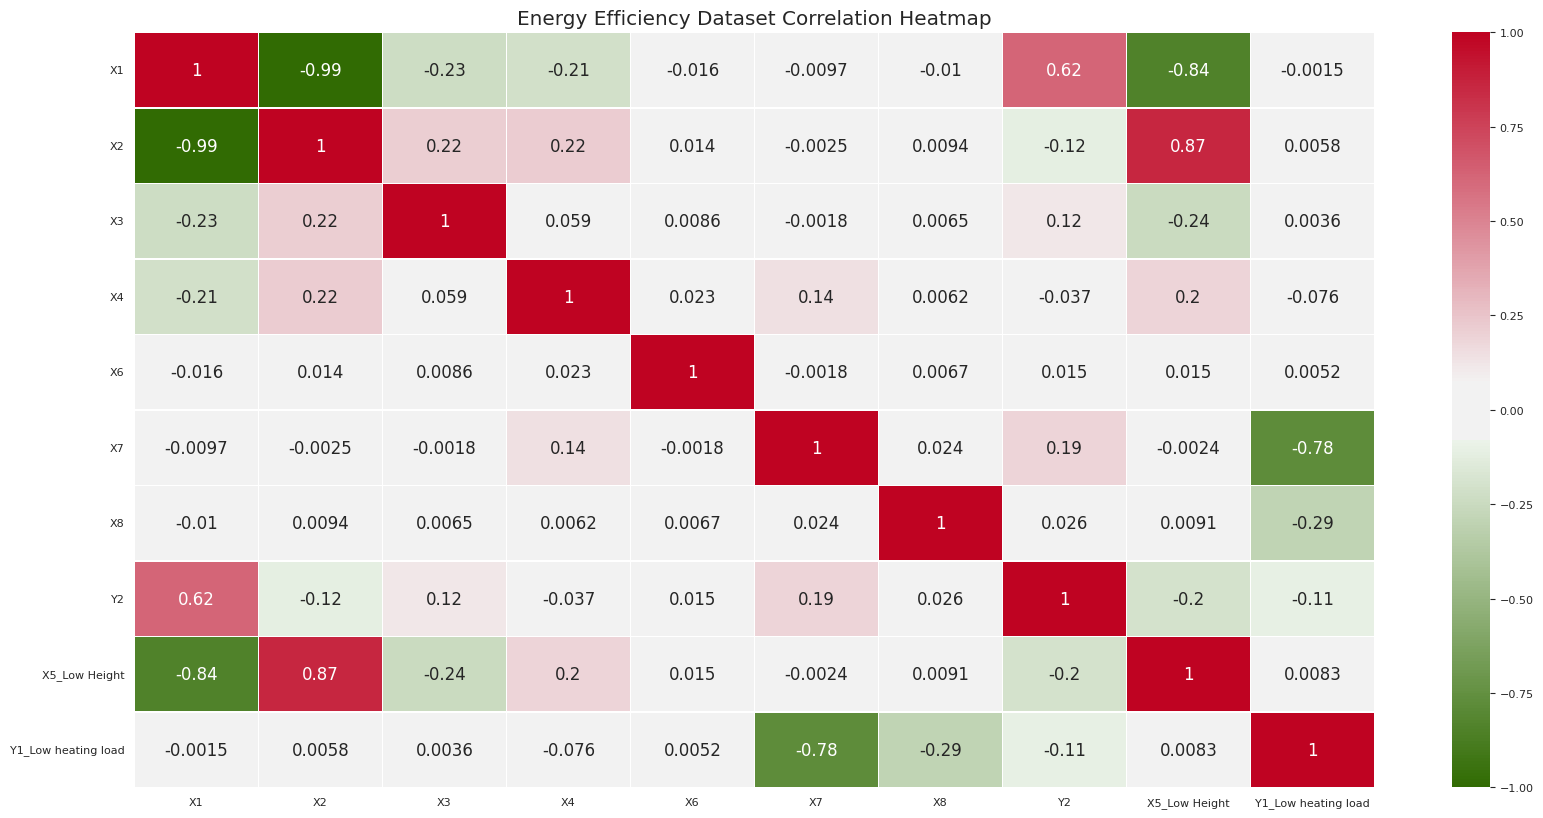



COVARIANCE MATRIX
                             X1            X2           X3             X4  \
X1                    0.011552     -9.544492    -1.036112     -12.514388   
X2                   -9.544492   7904.188390   828.588256   10959.779630   
X3                   -1.036112    828.588256  1824.602829    1373.788288   
X4                  -12.514388  10959.779630  1373.788288  301520.855306   
X6                   -0.001905      1.386344     0.404440      14.008592   
X7                   -0.000138     -0.029946    -0.009982      10.310809   
X8                   -0.001635      1.251863     0.417288       0.417288   
Y2                    0.652185  -1398.661451   700.291363   -2787.071597   
X5_Low Height        -0.045110     38.481557    -5.181361      53.637671   
Y1_Low heating load  -0.000076      0.237241     0.070207     -19.227398   

                            X6         X7        X8            Y2  \
X1                   -0.001905  -0.000138 -0.001635      0.652185   
X2  

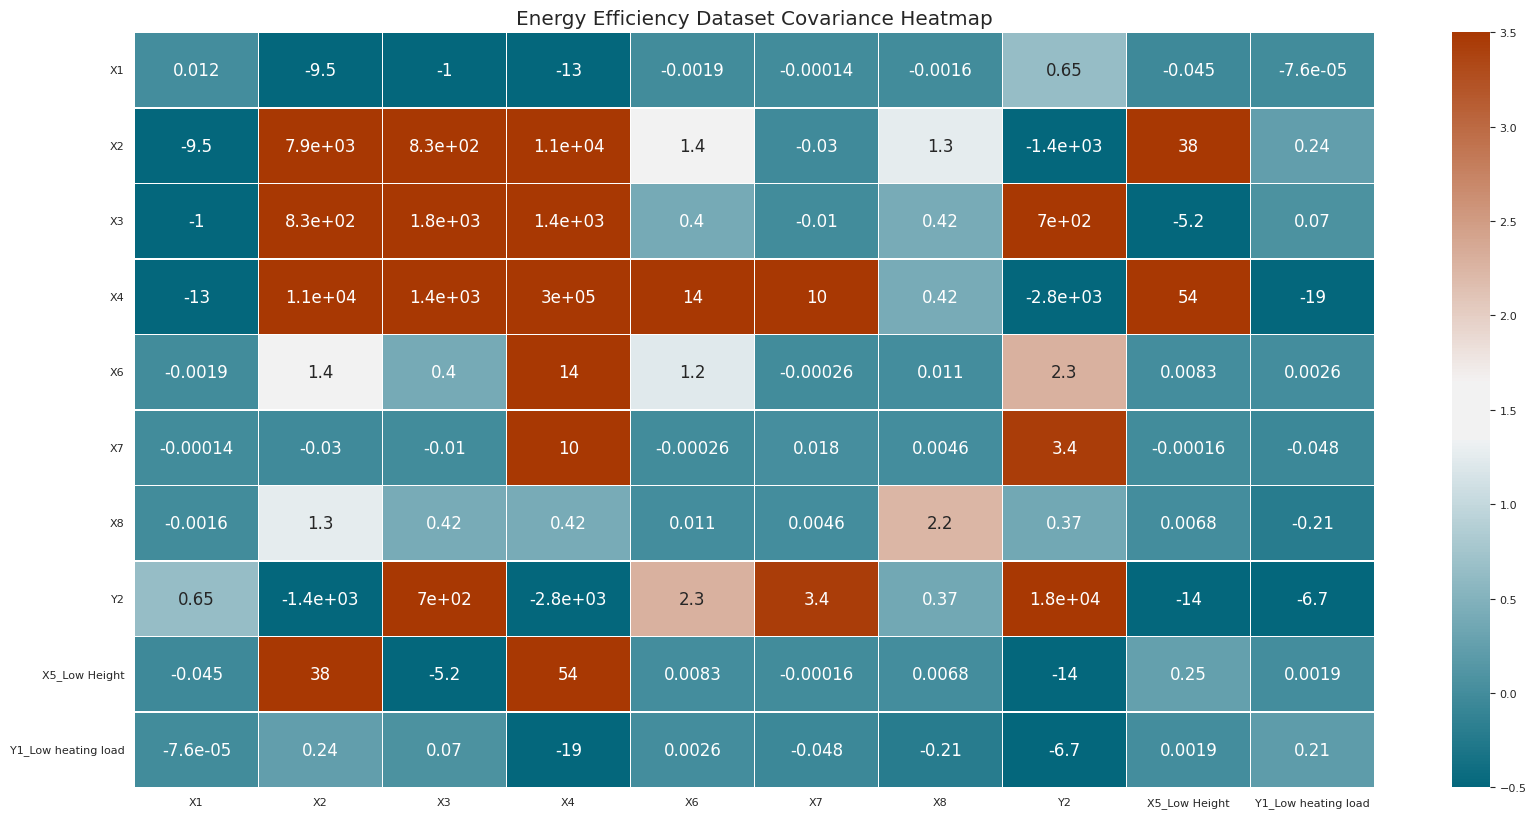

In [ ]:
# Multivariate numerical descriptive statistics

#Correlation Matrix
print("CORRELATION MATRIX\n",df.corr())
print("\n\n")

#Correlation Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (20,10))
cmap = sns.diverging_palette(120, 10, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((df).corr(), vmin = -1, vmax = 1, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Energy Efficiency Dataset Correlation Heatmap")
plt.show()

# Covariance Matrix
print("\n\nCOVARIANCE MATRIX\n",df.cov())
print("\n\n")

#Covariance Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (20,10))
cmap = sns.diverging_palette(220, 20, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True) 
sns.heatmap((df).cov(), vmin = -0.5, vmax = 3.5, annot = True, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Energy Efficiency Dataset Covariance Heatmap")
plt.show()

                                             |          | [  0%]   00:00 -> (? left)


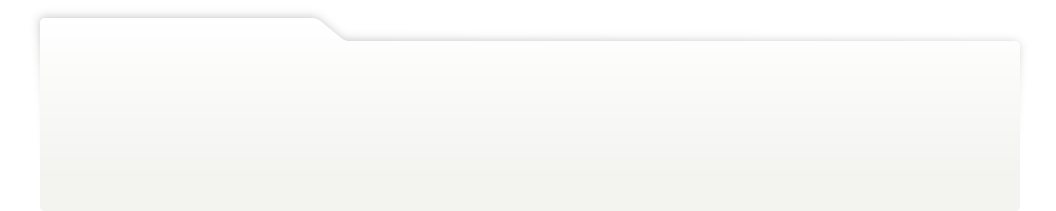
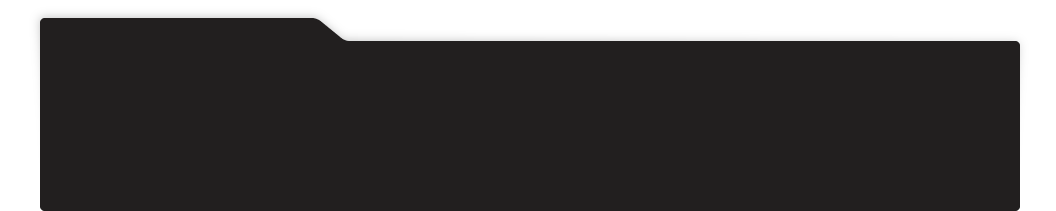
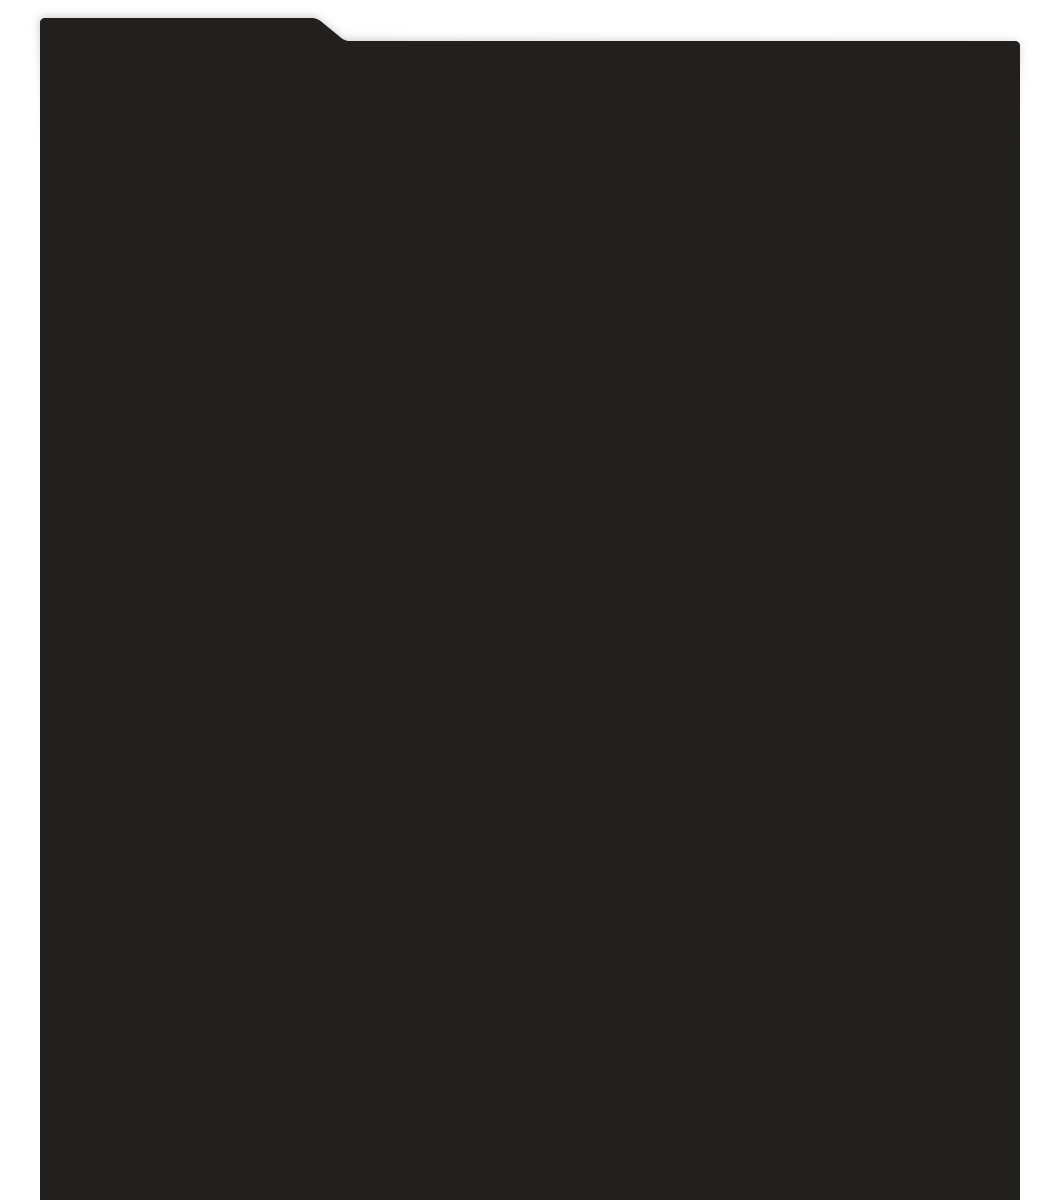
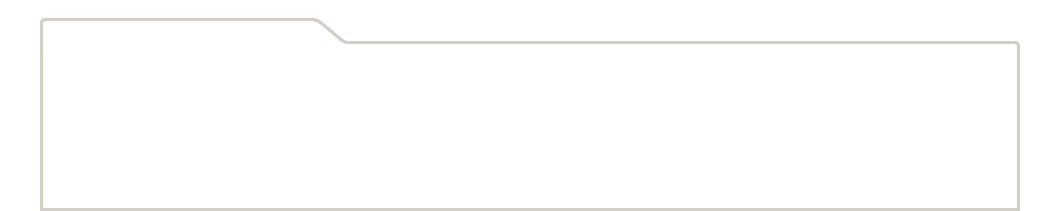
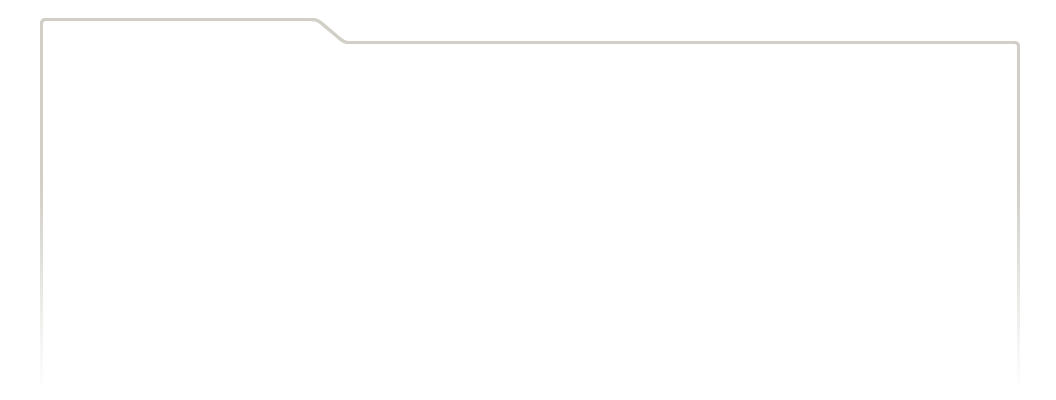
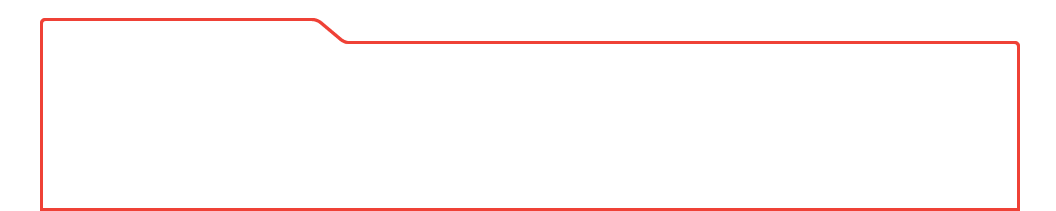
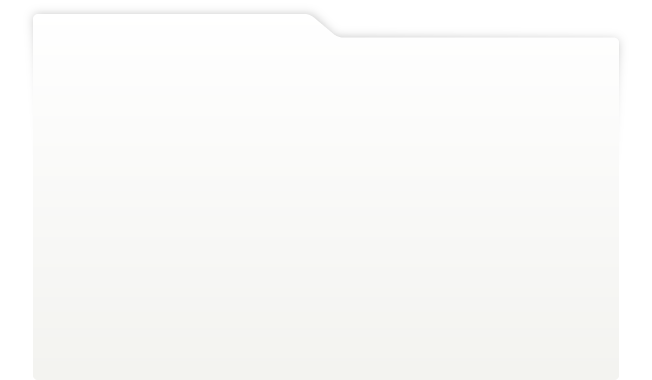
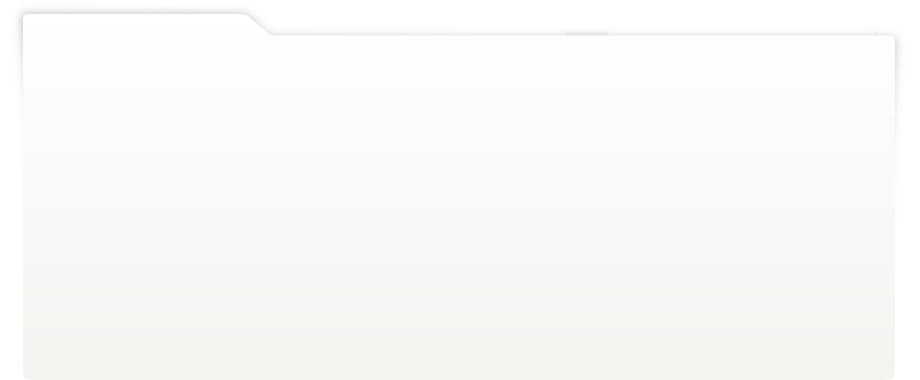
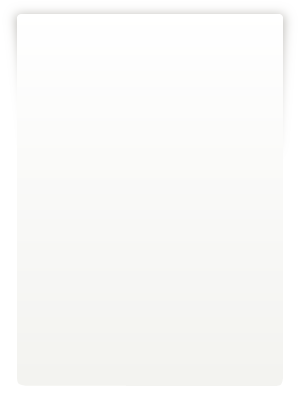
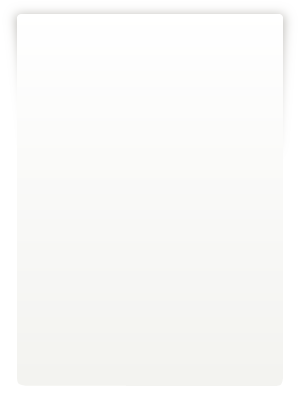
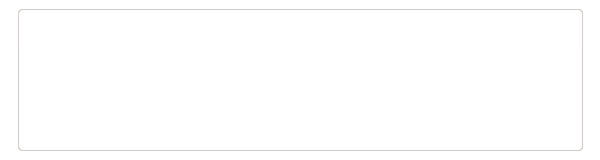
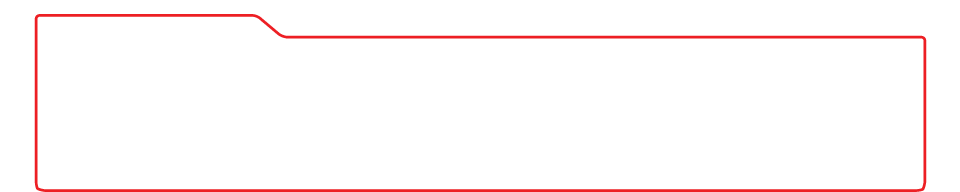
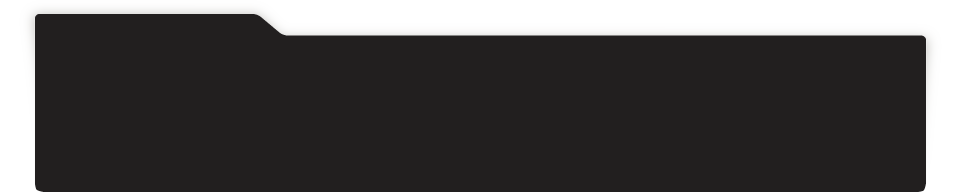
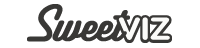
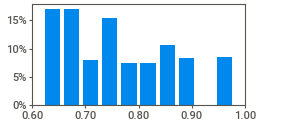
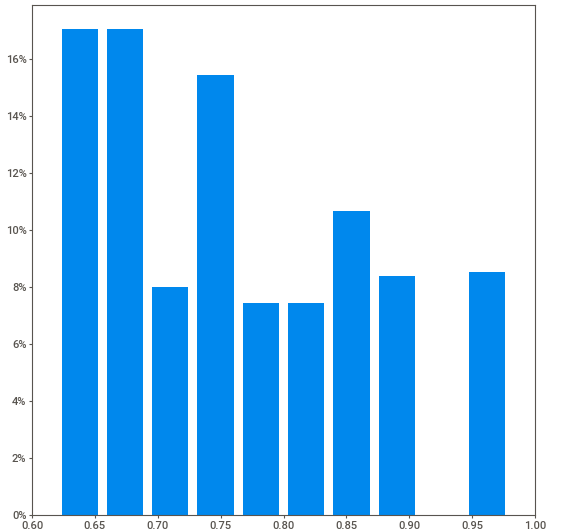
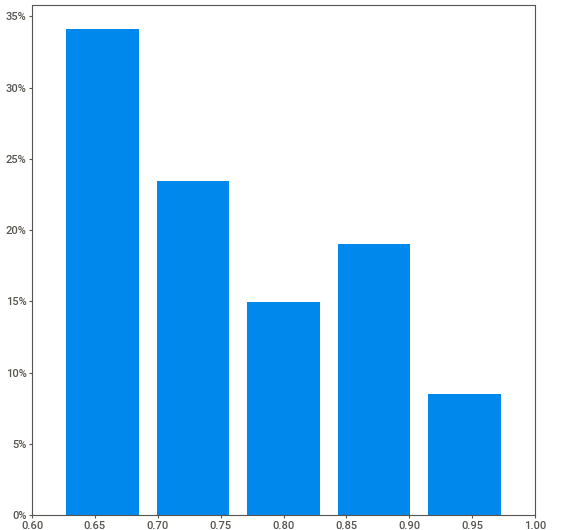
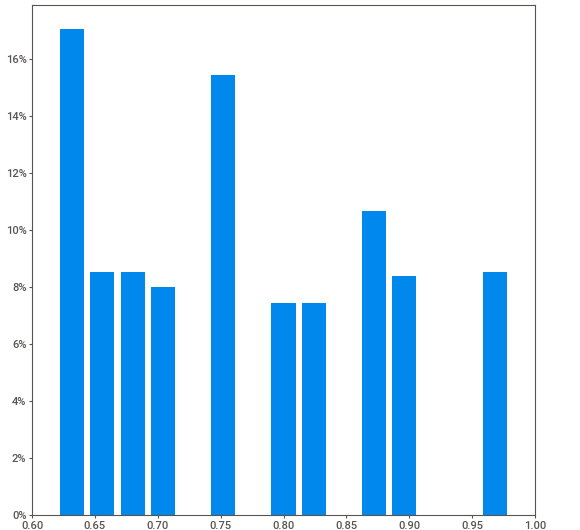
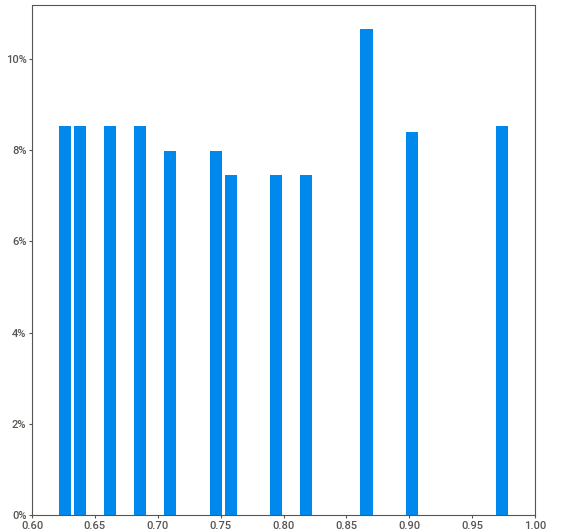
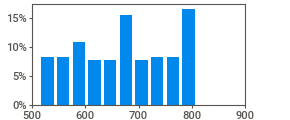
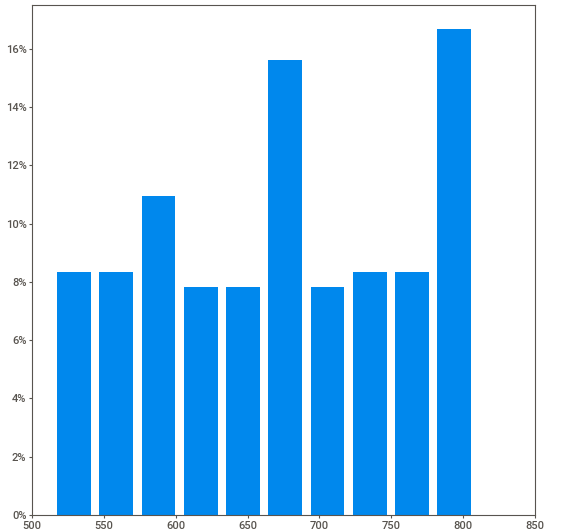
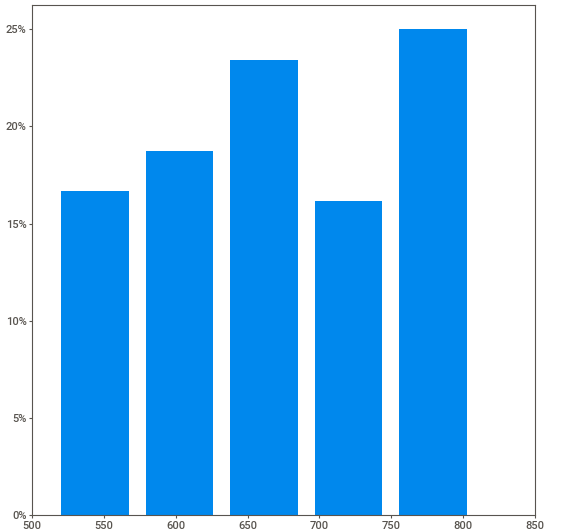
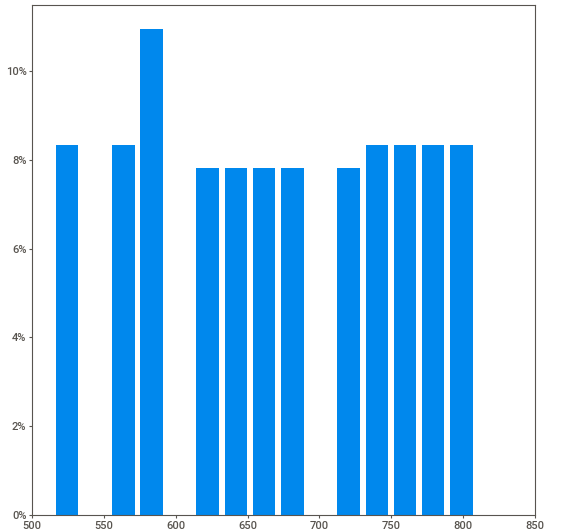
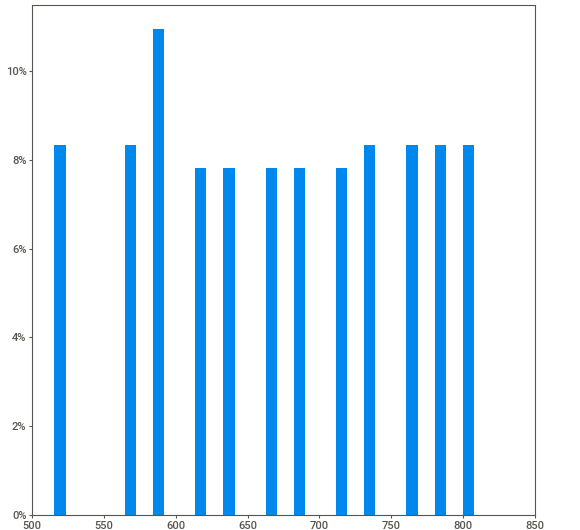
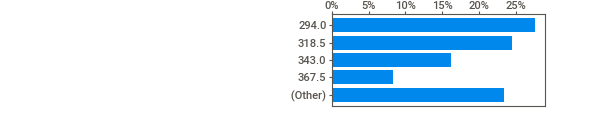
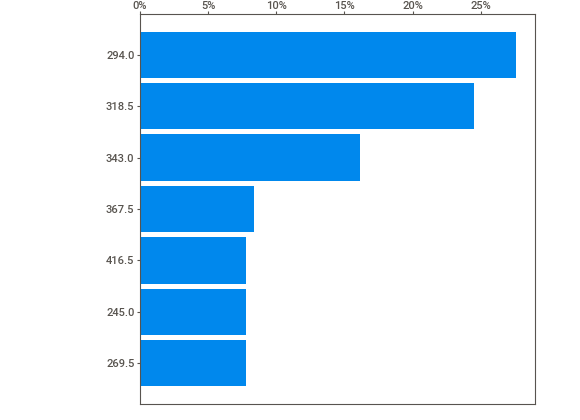
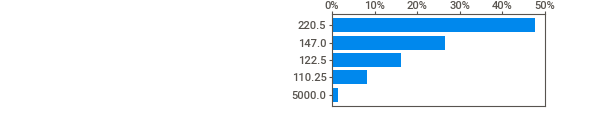
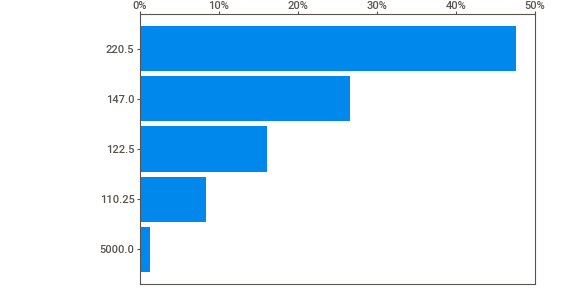
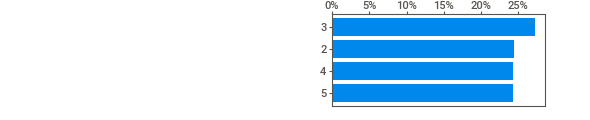
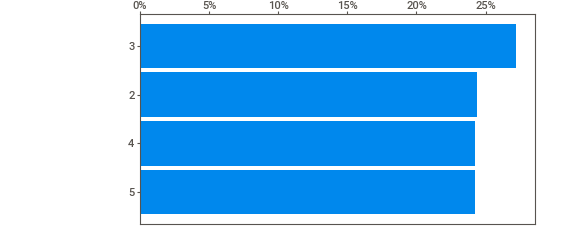
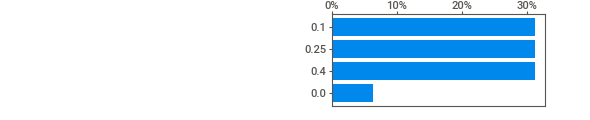
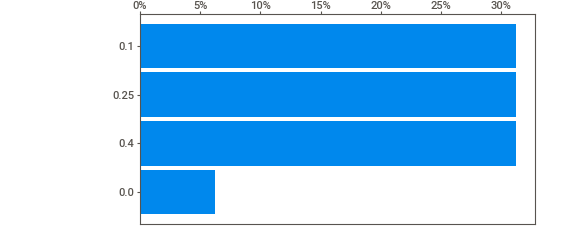
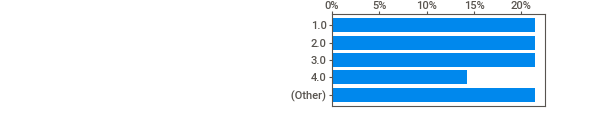
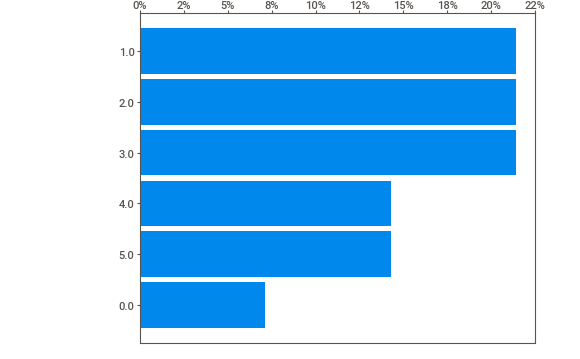
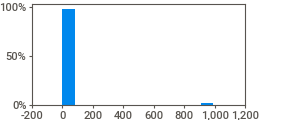
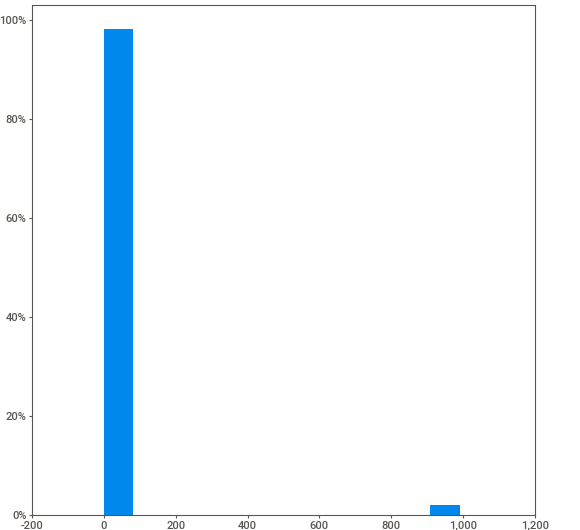
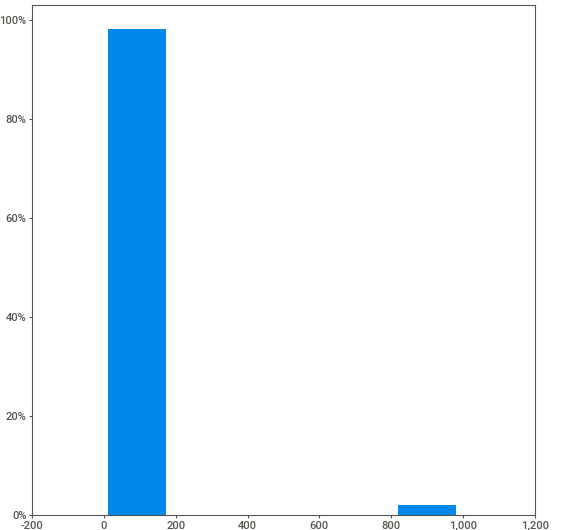
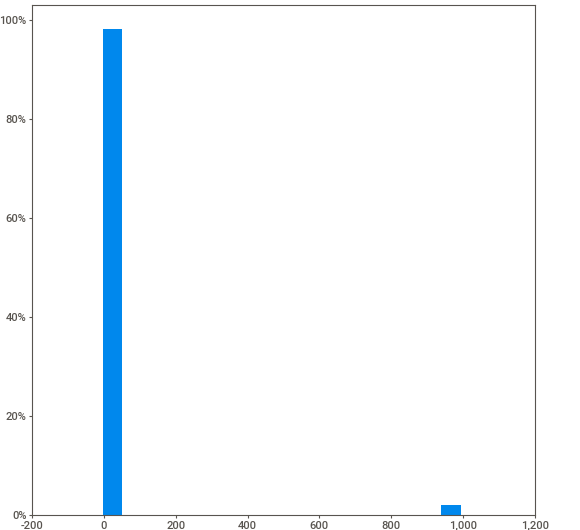
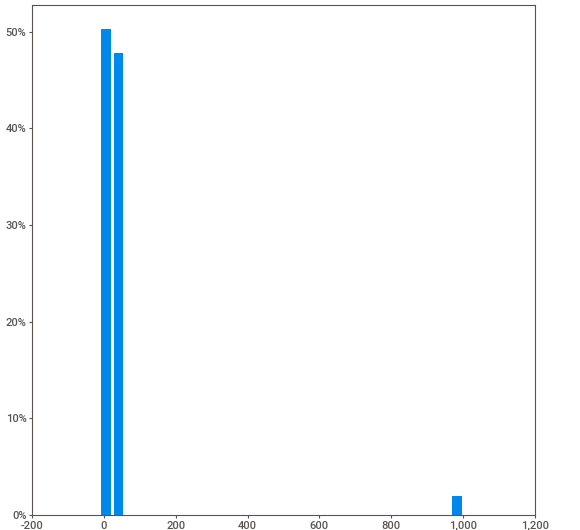
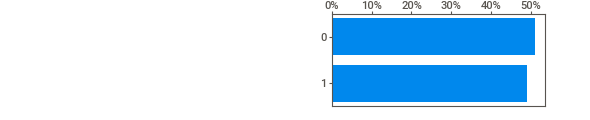
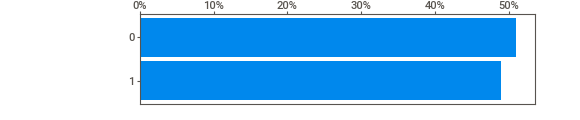
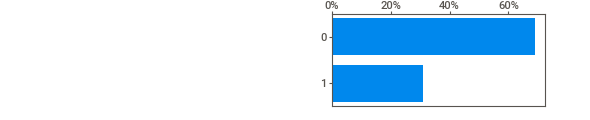
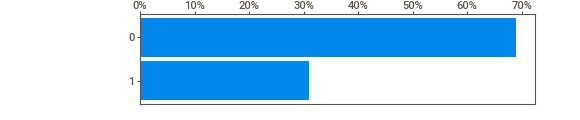
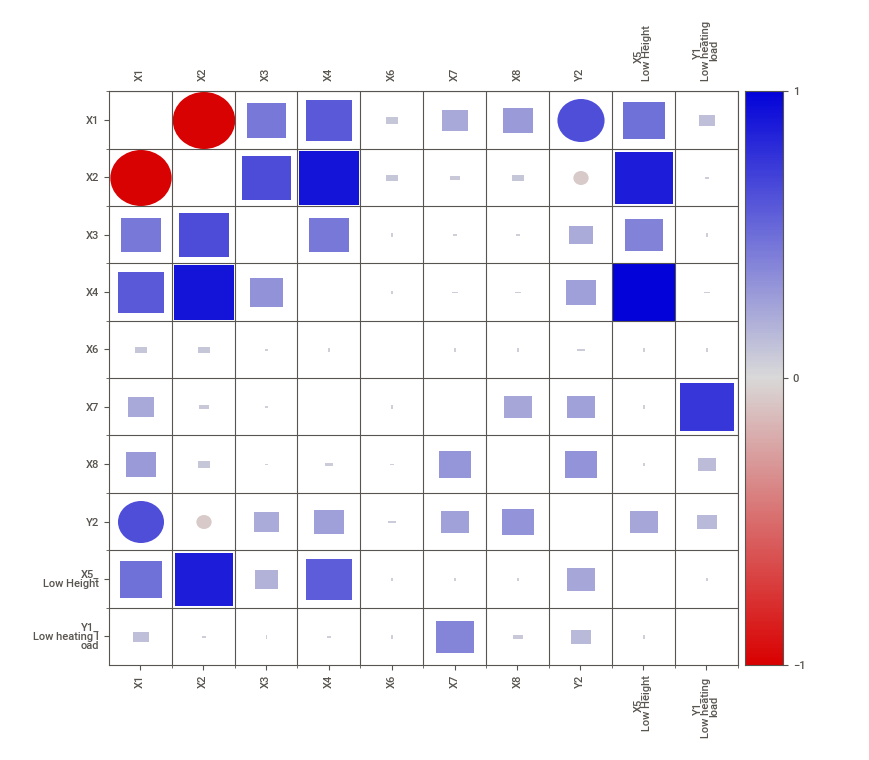
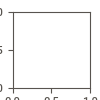

In [ ]:
# Sweetviz as an example of automated visualization
vizreport = sv.analyze(df)           
vizreport.show_notebook(layout='widescreen', w=1500, h=300, scale=0.7) #widescreen layout

## **Box Plot/ Violin Plot**

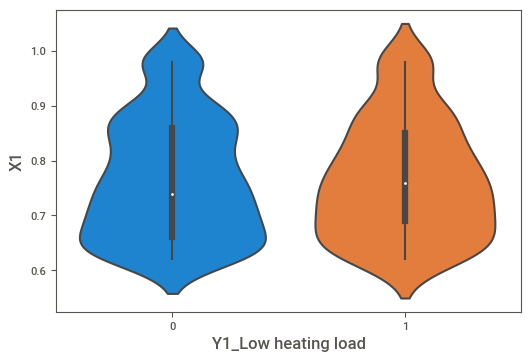

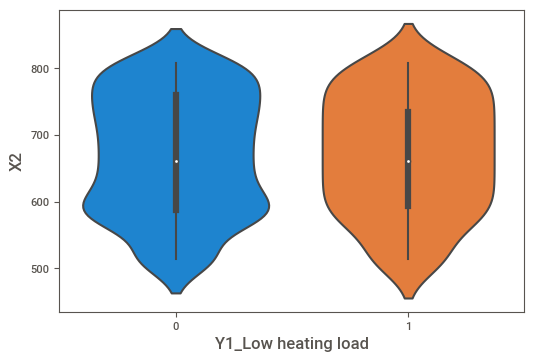

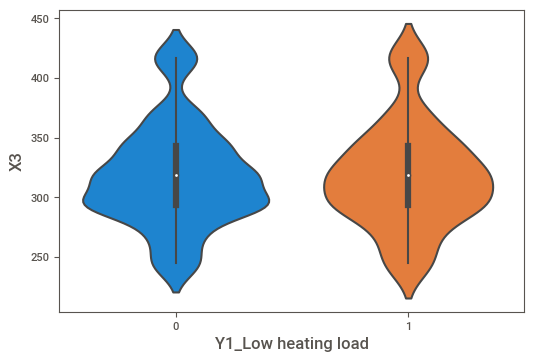

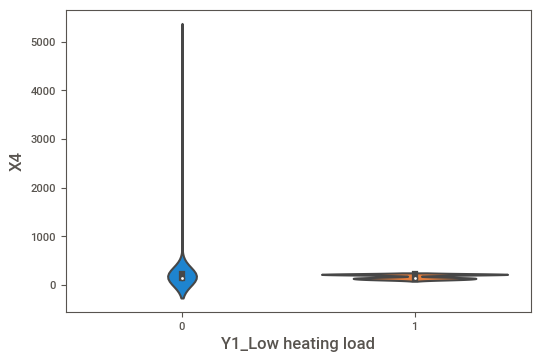

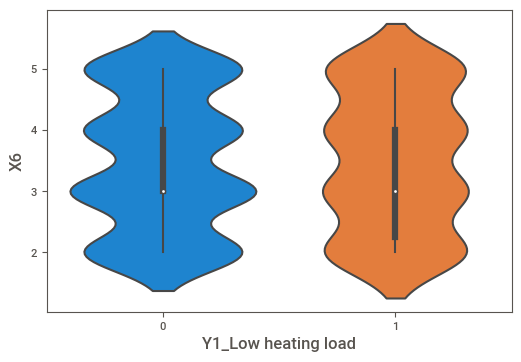

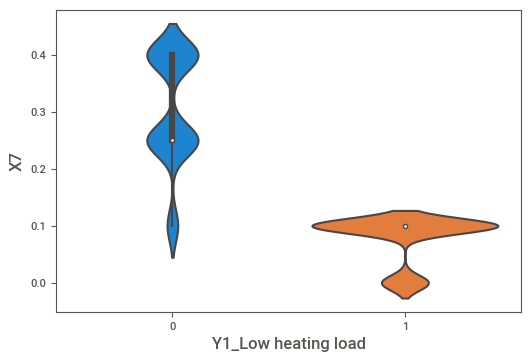

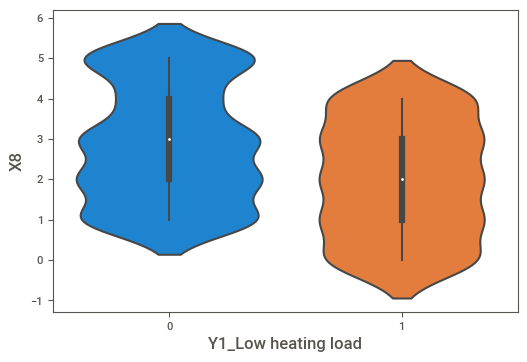

In [ ]:
# Bivariate violinplots
sns.violinplot(x ="Y1_Low heating load", y ="X1", data = df, split = True)
plt.show()
sns.violinplot(x ="Y1_Low heating load", y ="X2", data = df, split = True)
plt.show()
sns.violinplot(x ="Y1_Low heating load", y ="X3", data = df, split = True)
plt.show()
sns.violinplot(x ="Y1_Low heating load", y ="X4", data = df, split = True)
plt.show()
sns.violinplot(x ="Y1_Low heating load", y ="X6", data = df, split = True)
plt.show()
sns.violinplot(x ="Y1_Low heating load", y ="X7", data = df, split = True)
plt.show()
sns.violinplot(x ="Y1_Low heating load", y ="X8", data = df, split = True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


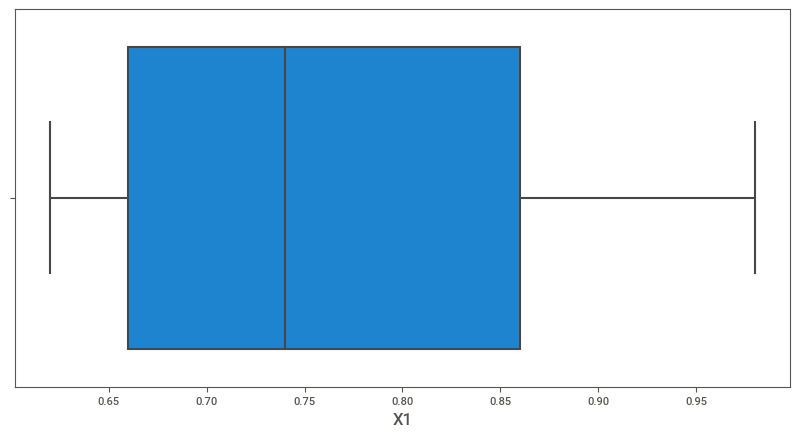

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


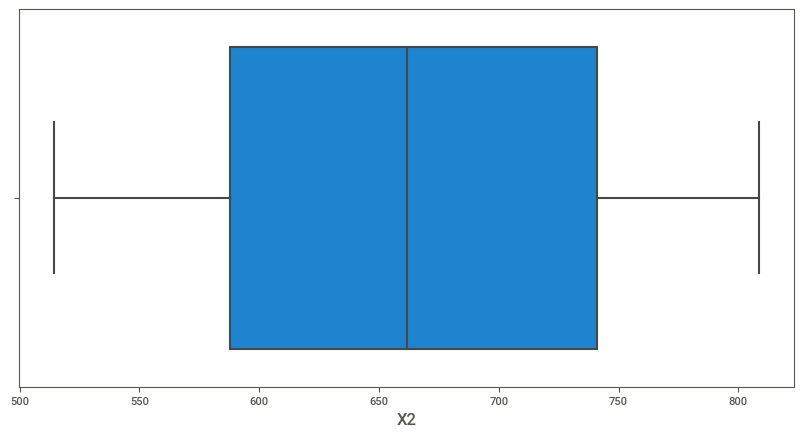

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


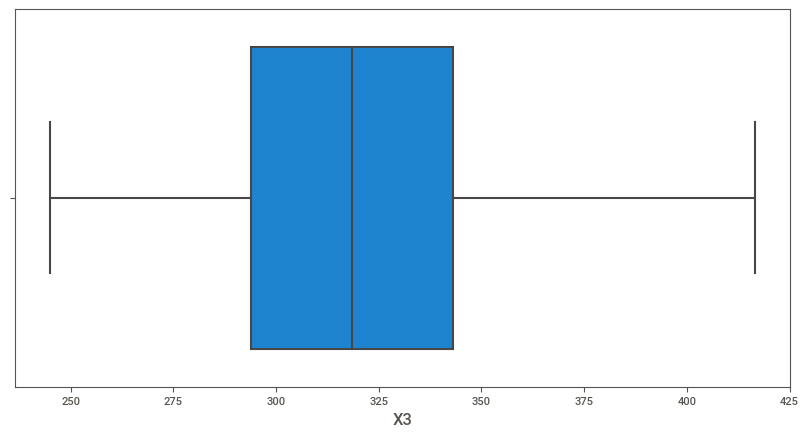

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


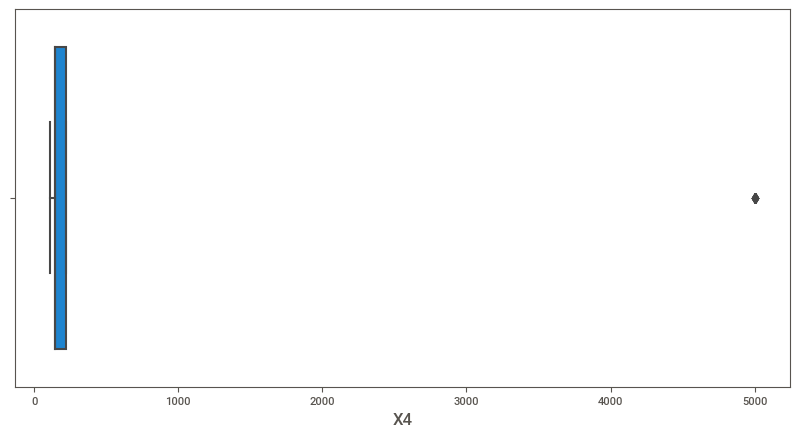

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


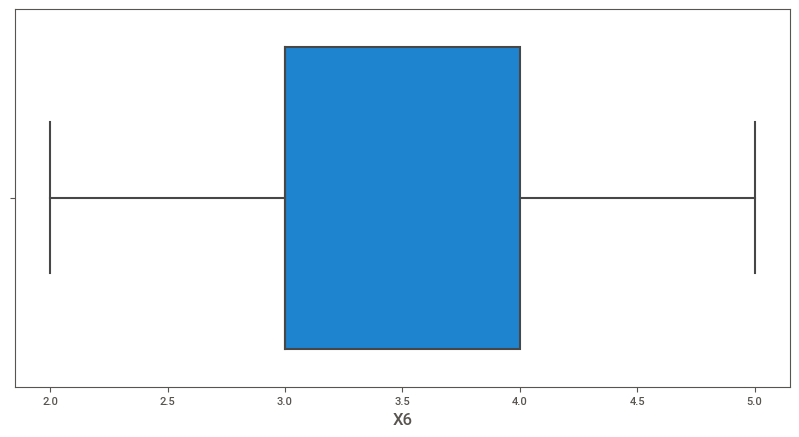

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


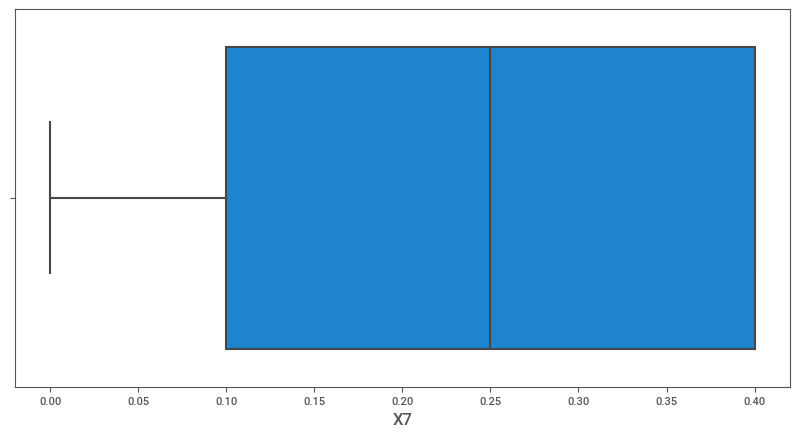

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


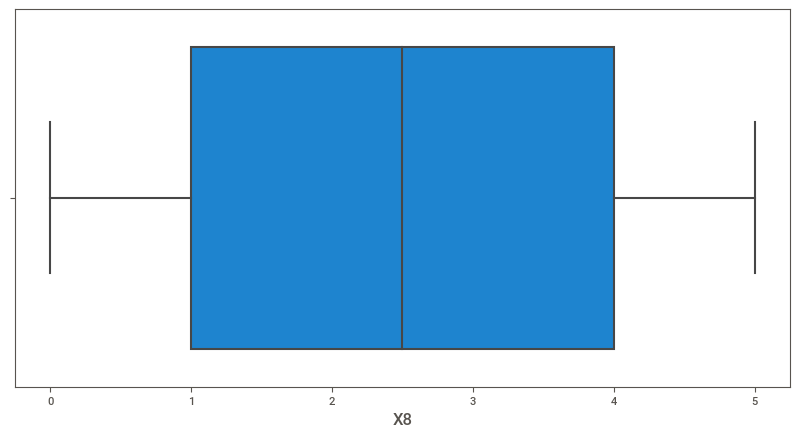

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


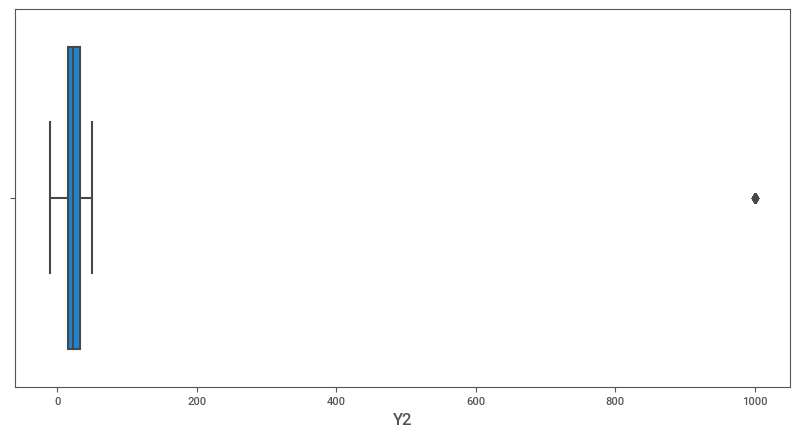

In [ ]:
# Outlier detection in quant varianbles 
for i in df.columns:
  if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
    plt.figure(figsize = (10,5))
    sns.boxplot(df[i])
    plt.show()

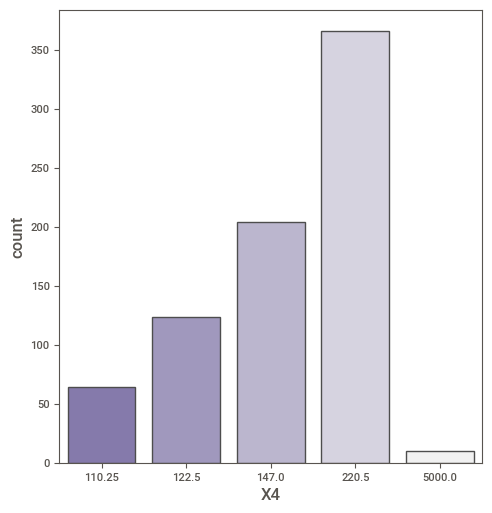

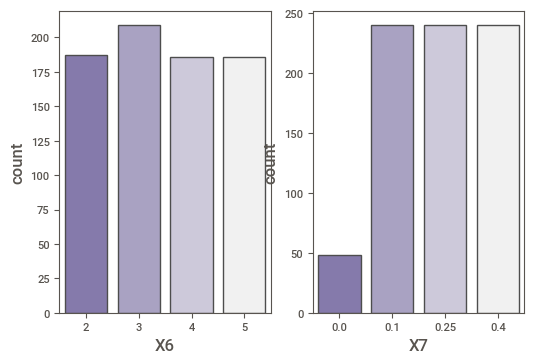

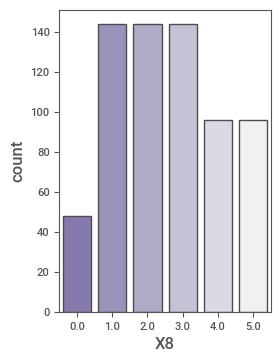

In [ ]:
# Univariate Bar Charts

plt.figure(figsize = (12,6))
plt.subplot(1,2,2)
sns.countplot(  x="X4", data=df,palette="light:m_r",
    edgecolor=".3")
plt.show()
plt.subplot(1,2,1)
sns.countplot(  x="X6", data=df,palette="light:m_r",
    edgecolor=".3")
plt.subplot(1,2,2)
sns.countplot(  x="X7", data=df,palette="light:m_r",
    edgecolor=".3")
plt.show()
plt.subplot(1,2,1)
sns.countplot(  x="X8", data=df,palette="light:m_r",
    edgecolor=".3")

## **Pairplot**

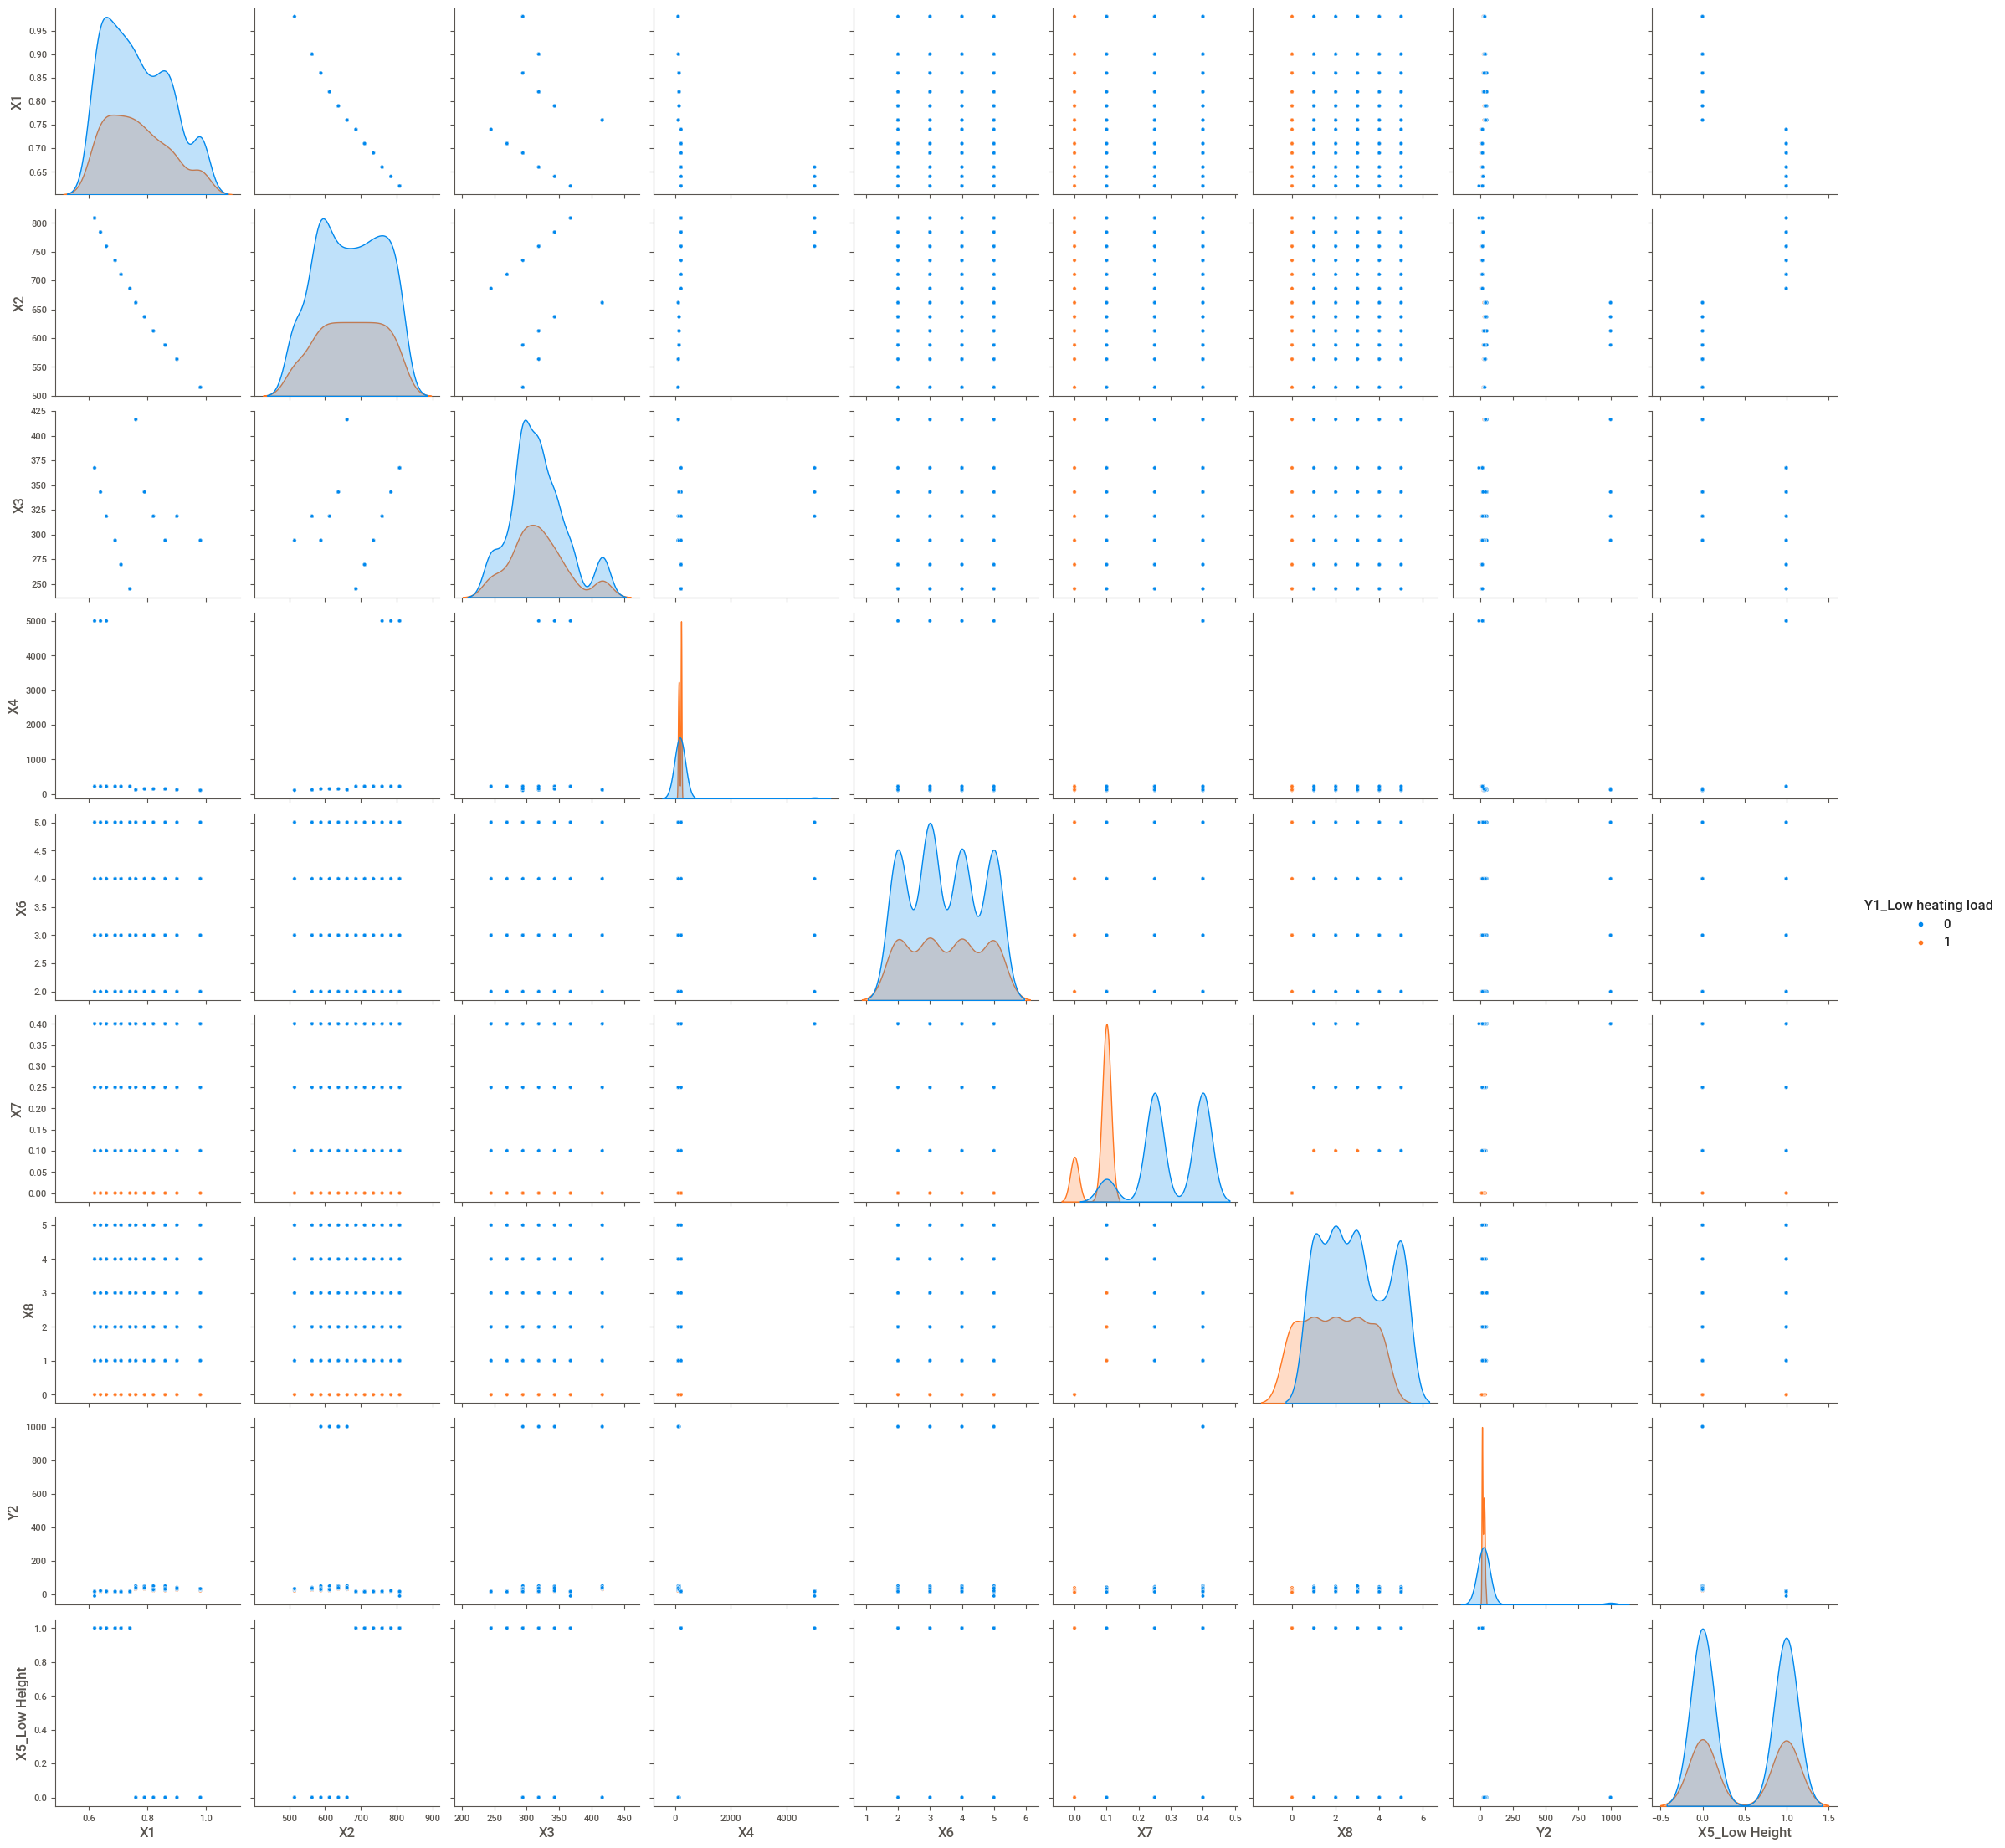

In [ ]:
sns.pairplot(df, hue='Y1_Low heating load')

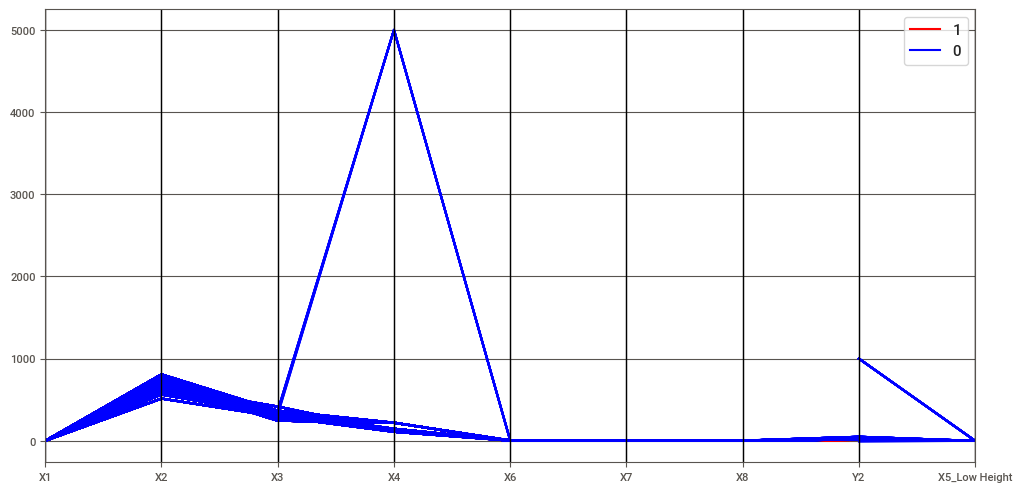

In [ ]:
# Multivariate Outliers (identification using a parallel coordinates plot)
plt.figure(figsize = (12,6))
pd.plotting.parallel_coordinates(
    df, 'Y1_Low heating load', color=('red', 'blue'))
plt.show()

In [ ]:
# Crosstab
print('y1 vs X7\n',pd.crosstab(df['Y1_Low heating load'], df['X7']))

y1 vs X7
 X7                   0.00  0.10  0.25  0.40
Y1_Low heating load                        
0                       0    50   240   240
1                      48   190     0     0


# **Conclusion**

1.   **it is a classification project.**
2.   X1, X2, X3, X4, X7, X8 is ‘float64’; X5,Y1(target variable) is ‘object’; X6 is ‘int64’.
3.   X4, X5, X6, X7, X8 is categorical, others are quantitative.
4.   There are missing values in X1, X8, Y2.
5.   There are 22 duplicates.
6.   General univariate descriptive statistics is shown above.
7.   Skewness is a concern for some variables like X4, Y2. Y1 have moderate skewness. Y2 have high skewness.
8.   There are outliers in X4, Y2.
9.   One-hot encoding.
10.  It is neither numeric nor balanced.
11.  Only X7, the glazing area, have strong correlation with Y1. The correlation is -0.78. Therefore, it is a good predictor.

